In [176]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [177]:
file_name = 'data/yougov-climate.csv'
DF = pd.read_csv(file_name,index_col=0)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know
country,,,,,
GB,833,604,49,33,114
US,507,493,120,80,133


In [178]:
DF.keys()

Index(['The climate is changing and human activity is mainly responsible  ',
       'The climate is changing and human activity is partly responsible, together with other factors  ',
       'The climate is changing but human activity is not responsible at all  ',
       'The climate is not changing  ', 'Don't know'],
      dtype='object')

In the lecture we analyzed the following questions for the first column in the data:

### First question:

What percent of **all respondents** think the climate is changing and human activity is mainly responsible?  

### Second question:

What percent of **GB respondents** think the climate is changing and  human activity is mainly responsible?  

### Third Question

What percent of **US respondents** think the climate is changing and  human activity is mainly responsible?  

**Q1** Repeat the analysis from the lecture notes for one of the other columns/questions.

1. Percent total
2. Percent from GB
3. Percent from US

Talk about the conditional probability in this case:

eg. In a person is from ________ then there is a ________ probability that they believe _______. If a person answered _______ then they are more likley to be from ________. 

In [180]:
DF.loc['total']= DF.sum(axis=0)
DF['total'] = DF.sum(axis=1)
DF

,The climate is changing and human activity is mainly responsible,"The climate is changing and human activity is partly responsible, together with other factors",The climate is changing but human activity is not responsible at all,The climate is not changing,Don't know,total
country,,,,,,
GB,833,604,49,33,114,1633
US,507,493,120,80,133,1333
total,1340,1097,169,113,247,2966


In [181]:
us_respondants = DF['total'].loc['US']
US_nothumans = DF['The climate is changing but human activity is not responsible at all  ']['US']
US_nothumans/us_respondants

0.0900225056264066

In [182]:
gb_respondants = DF['total'].loc['GB']
GB_nothumans = DF['The climate is changing but human activity is not responsible at all  ']['GB']
GB_nothumans/gb_respondants

0.030006123698714023

If a person is from the US then there is a 9% probability that they believe the climate is changing but humans are not responsible. If a person answered climate change is not caused by humans then they are more likley to be from the US.

## Berkeley admission data example

- Study carried out by the Graduate Division of the University of California, Berkeley in the early 70’s to evaluate whether there was a gender bias in graduate admissions.
- The data come from six departments. For confidentiality we'll call them A-F. 
- We have information on whether the applicant was male or female and whether they were admitted or rejected. This is an old study so only two binary classifications were used. 

### Here is the data


In [185]:
file_name = 'data/berkley.csv'
DF = pd.read_csv(file_name)
show(DF)

In [186]:
DF_melt = pd.melt(DF,id_vars=['Department'],var_name='MF',value_name='Number')
DF_melt

,Department,MF,Number
0,A,Male Yes,512
1,B,Male Yes,353
2,C,Male Yes,120
3,D,Male Yes,138
4,E,Male Yes,53
5,F,Male Yes,22
6,A,Male No,313
7,B,Male No,207
8,C,Male No,205
9,D,Male No,279


In [187]:
DF_melt['gender'] = DF_melt['MF'].apply(lambda x: x.split(' ')[0]).copy()
DF_melt['admitted'] = DF_melt['MF'].apply(lambda x: x.split(' ')[1]).copy()

In [188]:
DF_melt

,Department,MF,Number,gender,admitted
0,A,Male Yes,512,Male,Yes
1,B,Male Yes,353,Male,Yes
2,C,Male Yes,120,Male,Yes
3,D,Male Yes,138,Male,Yes
4,E,Male Yes,53,Male,Yes
5,F,Male Yes,22,Male,Yes
6,A,Male No,313,Male,No
7,B,Male No,207,Male,No
8,C,Male No,205,Male,No
9,D,Male No,279,Male,No


### Gender distribution by department

What can we say about the gender distribution if we look at the individual departments.

Start with our original "melted" data frame:

#### Lets pivot!

Pivot this data so that our departments become the column labels and our MF column becomes the index.

In [191]:
DF_dept = DF_melt.pivot(index='MF',columns='Department',values='Number')
DF_dept

Department,A,B,C,D,E,F
MF,,,,,,
Female No,19,8,391,244,299,317
Female Yes,89,17,202,131,94,24
Male No,313,207,205,279,138,351
Male Yes,512,353,120,138,53,22


**Q2** Calculate the proportions for the other departments. We did department A in the lecture. You can use the code from the lecture or come up with your own way to do this. You can do this one by one or try using a FOR loop.

Talk about what you see in these proportions. Which departments admit a large number of women? How do your number align with the visualization below?

In [193]:
prob_femaleB = DF_dept['B']['Female Yes']/(DF_dept['B']['Female Yes']+DF_dept['B']['Female No'])
prob_maleB = DF_dept['B']['Male Yes']/(DF_dept['B']['Male Yes']+DF_dept['B']['Male No'])

In [194]:
prob_maleB

0.6303571428571428

In [195]:
prob_femaleB

0.68

In [196]:
prob_femaleC = DF_dept['C']['Female Yes']/(DF_dept['C']['Female Yes']+DF_dept['C']['Female No'])
prob_maleC = DF_dept['C']['Male Yes']/(DF_dept['C']['Male Yes']+DF_dept['C']['Male No'])

In [197]:
prob_femaleC

0.3406408094435076

In [198]:
prob_maleC

0.36923076923076925

In [199]:
prob_femaleD = DF_dept['D']['Female Yes']/(DF_dept['D']['Female Yes']+DF_dept['D']['Female No'])
prob_maleD = DF_dept['D']['Male Yes']/(DF_dept['D']['Male Yes']+DF_dept['D']['Male No'])

In [200]:
prob_femaleD

0.34933333333333333

In [201]:
prob_maleD

0.33093525179856115

In [202]:
prob_femaleE = DF_dept['E']['Female Yes']/(DF_dept['E']['Female Yes']+DF_dept['E']['Female No'])
prob_maleE = DF_dept['E']['Male Yes']/(DF_dept['E']['Male Yes']+DF_dept['E']['Male No'])

In [203]:
prob_femaleE

0.23918575063613232

In [204]:
prob_maleE

0.2774869109947644

In [205]:
prob_femaleF = DF_dept['F']['Female Yes']/(DF_dept['F']['Female Yes']+DF_dept['F']['Female No'])
prob_maleF = DF_dept['F']['Male Yes']/(DF_dept['F']['Male Yes']+DF_dept['F']['Male No'])

In [206]:
prob_femaleF

0.07038123167155426

In [207]:
prob_maleF

0.058981233243967826

Department A and B admit a large number of women. The other departments admit less than 50% of women. These numbers match up with the histogram below, the other departments clearly admit less than half of the women.

### Here is a plot of the proportions data

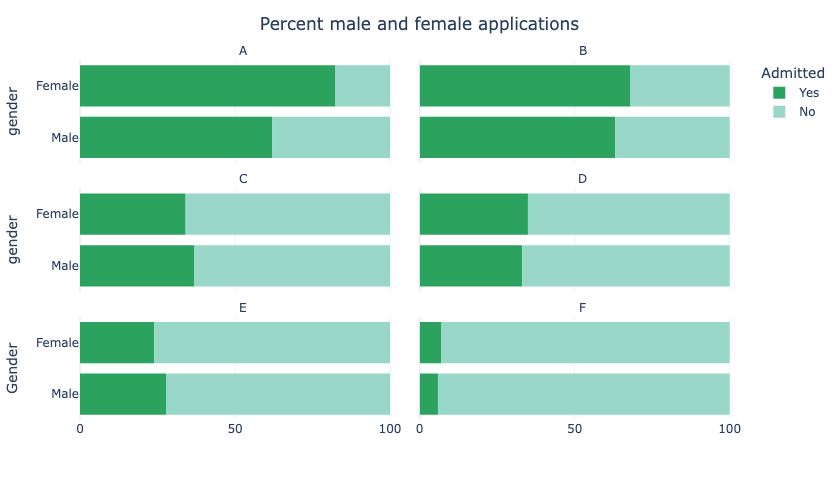

In [210]:
fig = px.histogram(DF_melt,
                   y='gender',
                   x='Number',
                   barnorm = "percent",
                   color='admitted',
                   facet_col='Department',
                   facet_col_wrap=2,
                   color_discrete_map = {'No':'#99d8c9','Yes':'#2ca25f'})

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(title_text='')

fig.update_layout(title='Percent male and female applications',
                  title_x=0.5,
                  template="plotly_white",
                  xaxis_title="",
                  yaxis_title="Gender",
                  legend_title='Admitted',
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

------------------------
------------------------

## Homework - Exercises

** Homework content and data from Data Science in a Box - he-05-legos.Rmd

This week we'll do some data gymnastics to refresh and review what we learned over the past few weeks using (**simulated**) data from Lego sales in 2018 for a sample of customers who bought Legos in the US. This is different than the data we used on the Exam!


### Data

In [212]:
file_name = 'data/lego-sales.csv'
DF = pd.read_csv(file_name)
DF

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216-555-2549,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819-555-3189,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819-555-3189,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
3,Chelsea,Bouchard,41,NaN,24695,31048,Creator,NaN,2018,Lakeside Lodge,368.0,29.99,http://images.brickset.com/sets/images/31048-1...,1
4,Chelsea,Bouchard,41,NaN,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801-555-2343,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2
616,Spencer,Morgan,28,784-555-3455,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2
617,Spencer,Morgan,28,784-555-3455,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1
618,Amelia,Hageman,40,336-555-1950,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2


### Exercises

* Answer the following questions using reproducible Python code.
* For each question, state your answer in a sentence, e.g. "In this sample, the first three common names of purchasers are ...".
* Note that the answers to all questions are within the context of this particular sample of sales, i.e. you shouldn't make inferences about the population of all Lego sales based on this sample.

-------------

1.  Describe what you see in the data set (variables, observations, etc)

2.  What are the three most common first names of purchasers?

3.  What are the three most common themes of Lego sets purchased?

4.  Among the most common theme of Lego sets purchased, what is the most common subtheme?

5.  Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks and create separate data frames -OR- create a new column with these categorical labels (more advanced).

6.  Which age group has purchased the highest number of Lego sets.

7.  Which age group has spent the most money on Legos?

8.  Which Lego theme has made the most money for Lego? HINT: Simpler than #5, just use a groupby()

9.  Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. HINT: You will need to split the phone number and get just the first three. You decided what to do about reporting the NaNs.

10.  Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

In [214]:
DF.keys()

Index(['first_name', 'last_name', 'age', 'phone_number', 'set_id', 'number',
       'theme', 'subtheme', 'year', 'name', 'pieces', 'us_price', 'image_url',
       'quantity'],
      dtype='object')

## 1. Describe what you see in the data set (variables, observations, etc)

There are 620 observations and 14 columns. It shows the purchase info of customers, including their name, age, phone number, and information about the set they purchased.


In [216]:
DF['first_name'].value_counts()

first_name
Jackson       13
Joseph        11
Jacob         11
Michael       10
Kaitlyn        8
              ..
Gunnar         1
David          1
Lawrence       1
John'Dunae     1
Kimberly       1
Name: count, Length: 211, dtype: int64

## 2. What are the three most common first names of purchasers?

Jackson, Joseph, and Jacob are the three most common first names of purchasers.

In [218]:
DF['theme'].value_counts()

theme
Star Wars                  75
Nexo Knights               64
Gear                       55
Mixels                     55
City                       45
Friends                    42
Ninjago                    38
Duplo                      35
Bionicle                   34
Creator                    25
DC Comics Super Heroes     22
Elves                      22
Marvel Super Heroes        19
Dimensions                 18
Disney Princess            15
The Angry Birds Movie      11
Technic                    10
Architecture               10
Minecraft                   9
Advanced Models             4
Ghostbusters                3
Seasonal                    3
Collectable Minifigures     3
Ideas                       2
Classic                     1
Name: count, dtype: int64

## 3. What are the three most common themes of Lego sets purchased?

Star Wars, Nexo Knights, and Gear are the three most common themes of Lego sets purchased.

In [220]:
masktheme = (DF['theme']== 'Star Wars')
DFmasked = DF[masktheme]
show(DFmasked)

In [221]:
DFmasked['subtheme'].value_counts()

subtheme
The Force Awakens            15
Buildable Figures            11
Episode V                    10
MicroFighters                10
Battlefront                   7
Original Content              7
Episode III                   6
Rebels                        3
Seasonal                      3
Episode IV                    2
Ultimate Collector Series     1
Name: count, dtype: int64

## 4. Among the most common theme of Lego sets purchased, what is the most common subtheme?

Among the theme Star Wars, the most common subtheme is The Force Awakens.

## 5. Create data frames for each of the ages in the following categories: "18 and under", "19 - 25", "26 - 35", "36 - 50", "51 and over". HINT - use masks and create separate data frames -OR- create a new column with these categorical labels (more advanced).

In [224]:
maskunder18 = (DF['age']<= 18)
DFunder18 = DF[maskunder18]
show(DFunder18)

In [225]:
mask19_25 = (DF['age']>= 19) & (DF['age']<= 25)
DF19_25 = DF[mask19_25]
show(DF19_25)

In [226]:
mask26_35 = (DF['age']>= 26) & (DF['age']<= 35)
DF26_35 = DF[mask26_35]
show(DF26_35)

In [227]:
mask36_50 = (DF['age']>= 36) & (DF['age']<= 50)
DF36_50 = DF[mask36_50]
show(DF36_50)

In [228]:
mask51 = (DF['age']>= 51)
DF51 = DF[mask51]
show(DF51)

In [229]:
DFunder18.shape

(30, 14)

In [230]:
DF19_25.shape

(129, 14)

In [231]:
DF26_35.shape

(183, 14)

In [232]:
DF36_50.shape

(216, 14)

In [233]:
DF51.shape

(62, 14)

## 6. Which age group has purchased the highest number of Lego sets.

Ages 36-50 purchased the highest number of Lego sets (216 purchases)

In [235]:
DFunder18['us_price'].sum()

641.7

In [236]:
DF19_25['us_price'].sum()

3629.710000000001

In [237]:
DF26_35['us_price'].sum()

5260.169999999998

In [238]:
DF36_50['us_price'].sum()

6641.84

In [239]:
DF51['us_price'].sum()

1832.38

## 7. Which age group has spent the most money on Legos?

Ages 36-50 spent the most money on Legos ($6641.84 in total)

In [241]:
my_columns = ['theme','us_price']
DF.groupby(by=['theme'])[my_columns].sum()

,theme,us_price
theme,,
Advanced Models,Advanced ModelsAdvanced ModelsAdvanced ModelsA...,679.96
Architecture,ArchitectureArchitectureArchitectureArchitectu...,389.90
Bionicle,BionicleBionicleBionicleBionicleBionicleBionic...,549.66
City,CityCityCityCityCityCityCityCityCityCityCityCi...,1476.55
Classic,Classic,29.99
Collectable Minifigures,Collectable MinifiguresCollectable Minifigures...,11.97
Creator,CreatorCreatorCreatorCreatorCreatorCreatorCrea...,409.75
DC Comics Super Heroes,DC Comics Super HeroesDC Comics Super HeroesDC...,450.78
Dimensions,DimensionsDimensionsDimensionsDimensionsDimens...,369.82


## 8. Which Lego theme has made the most money for Lego? HINT: Simpler than #5, just use a groupby()

Star Wars made the most money for Lego.

In [243]:
show(DF)

I decided to get rid of the NaNs with the mask below. 

In [245]:
mask = DF['phone_number'].apply(lambda x:'-' in str(x) )
DF_9 =DF[mask]
show(DF_9)

In [246]:
DF_9['phone_number'] = DF_9['phone_number'].apply(lambda x: x.split('-')[0])
DF_9

,first_name,last_name,age,phone_number,set_id,number,theme,subtheme,year,name,pieces,us_price,image_url,quantity
0,Kimberly,Beckstead,24,216,24701,76062,DC Comics Super Heroes,Mighty Micros,2018,Robin vs. Bane,77.0,9.99,http://images.brickset.com/sets/images/76062-1...,1
1,Neel,Garvin,35,819,25626,70595,Ninjago,Rise of the Villains,2018,Ultra Stealth Raider,1093.0,119.99,http://images.brickset.com/sets/images/70595-1...,1
2,Neel,Garvin,35,819,24665,21031,Architecture,NaN,2018,Burj Khalifa,333.0,39.99,http://images.brickset.com/sets/images/21031-1...,1
8,Caleb,Garcia-Wideman,37,907,24730,41115,Friends,NaN,2018,Emma's Creative Workshop,108.0,9.99,http://images.brickset.com/sets/images/41115-1...,1
9,Caleb,Garcia-Wideman,37,907,25611,21127,Minecraft,Minifig-scale,2018,The Fortress,NaN,109.99,http://images.brickset.com/sets/images/21127-1...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Talise,Nieukirk,16,801,24902,41556,Mixels,Series 7,2018,Tiketz,62.0,4.99,http://images.brickset.com/sets/images/41556-1...,2
616,Spencer,Morgan,28,784,26041,41580,Mixels,Series 9,2018,Myke,63.0,4.99,NaN,2
617,Spencer,Morgan,28,784,26060,5005051,Gear,Digital Media,2018,Friends of Heartlake City Girlz 4 Life,NaN,19.99,NaN,1
618,Amelia,Hageman,40,336,24702,76063,DC Comics Super Heroes,Mighty Micros,2018,The Flash vs. Captain Cold,88.0,9.99,http://images.brickset.com/sets/images/76063-1...,2


In [247]:
columns9 = ['phone_number','us_price']
DF_areacode = DF_9[columns9]
show(DF_areacode)

In [248]:
DF_areacode.groupby(by=['phone_number'])[columns9].sum().sort_values('us_price', ascending=False)

,phone_number,us_price
phone_number,,
973,973973973973973973,444.94
281,281281281281281281281281281,434.91
956,956956,359.98
209,209209209209209,329.95
567,567567567567567567567567567,326.91
...,...,...
216,216,9.99
509,509,9.99
325,325325,9.98


## 9. Which area code has spent the most money on Legos? In the US the area code is the first 3 digits of a phone number. HINT: You will need to split the phone number and get just the first three. You decided what to do about reporting the NaNs.

The area code 973 spent the most money on Legos ($444.94 in total). I got rid of all the NaNs using a mask.

## 10. Come up with a question you want to answer using these data, and write it down. Then, create a data visualization that answers the question, and explain how your visualization answers the question.

What is the price range among Marvel, DC, and Star Wars lego sets?

In [251]:
DF.keys()

Index(['first_name', 'last_name', 'age', 'phone_number', 'set_id', 'number',
       'theme', 'subtheme', 'year', 'name', 'pieces', 'us_price', 'image_url',
       'quantity'],
      dtype='object')

In [252]:
my_themes = ['theme']
DF[my_themes].drop_duplicates()

,theme
0,DC Comics Super Heroes
1,Ninjago
2,Architecture
3,Creator
5,Duplo
6,Star Wars
8,Friends
9,Minecraft
12,Nexo Knights
13,Dimensions


In [253]:
mask10 = (DF['theme']=='DC Comics Super Heroes') | (DF['theme']=='Star Wars') | (DF['theme']=='Marvel Super Heroes')
DFthemes = DF[mask10]
show(DFthemes)

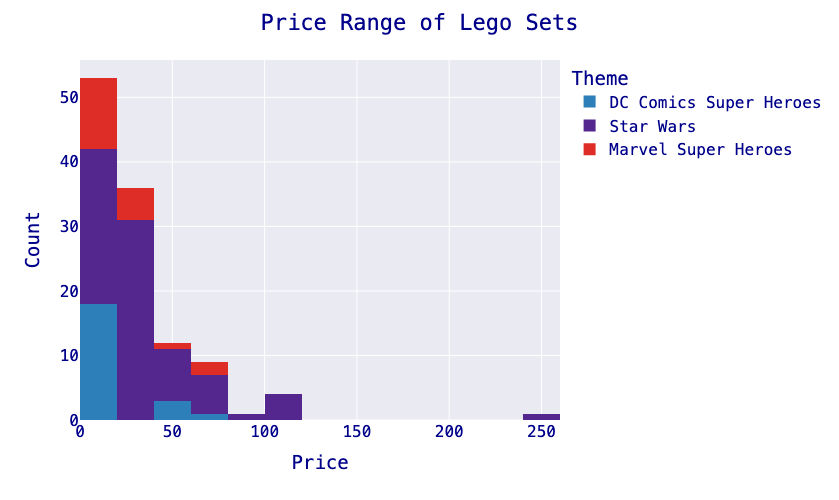

In [360]:
fig = px.histogram(DFthemes,
                   x='us_price',
                   color='theme',
                   color_discrete_map={'DC Comics Super Heroes':'#2c7fb8','Star Wars':'#54278f','Marvel Super Heroes':'#de2d26'},
                   nbins=20)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(title_text='')

fig.update_layout(title='Price Range of Lego Sets',
                  title_x=0.5,
                  template="seaborn",
                  xaxis_title="Price",
                  yaxis_title="Count",
                  legend_title='Theme',
                  font={'family':"Overpass, monospace",'size':16,'color':"Darkblue"},
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

The histogram focuses only on lego sets themed Marvel, DC, or Star Wars. It drops these sets into bins based on price and it illustrates how most sets are priced between about $0-80. There are other outliers that are more expensive. It is colored based on theme, and we can see that these more expensive sets are Star Wars themed. The majority of the sets between the three themes are Star Wars

## Essay Response

Give a brief report on what you are reading and what you have learned so far. If you chose your own articles please insert a link to the articles. If you chose a book, please give the book title and author.

1. What drew you to the book/articles
2. What have you learned so far.

eg. In the first chapter of the book the author talks about..... or My first article discusses..... or I disagree with what the author is saying so far.... or I really like what I am learning about because....

The book I am reading is Weapons of Math Destruction by Cathy O'Neil. I borrowed the book from the ones you offered to the class, but I was interested in this one in particular just because I like doing math. I've read the first three chapters and the general message so far is that mathematical models/data science can actually have a massive negative impact on society. The first chapter uses baseball as an example to show how data is used to create models that can predict the outcomes of various situations, and how this is used to help teams win the World Series. Further, the film Moneyball is centered around this practice of mathematical modeling and it was interesting because I have watched the film myself. The third chapter goes into how the U.S. News created a ranking system to rank colleges based on proxy data, and how this creates feedback loops that negatively impact colleges and students. I was really interested in this and I want to explain this specific example to my family since my younger sister still has to plan for college, and I want them to understand the reality of college admissions and how data plays a big role in it.